In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import precision_recall_curve,auc,classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
#ivanni libraries 

In [21]:
df=pd.read_csv(r"C:\Users\saipr\Downloads\creditcard.csv\creditcard.csv")
#paidi data download cheskuntunnam computer nunchi
#df anedi oka variable dataframe laga teeskuntunnam
print(df.head())#idi just top 5 values ivvadaniki 
df.dropna(inplace=True)#null values emanna vunte remove chestadi

In [22]:
col_list=[]
for col in df.columns:
    if(col!='Class'):
        col_list.append(col)
#ippudu divide chestunnam input(x) laga output(y) laga 
x=df[col_list]

y=df['Class']
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [23]:
logreg=LogisticRegression()#idi already prewritten function manam first lo libraries nunchi import chesam choodu 


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=234)
#idi split chestunnam train test data laga
smote=SMOTE(random_state=423)
x_train,y_train=smote.fit_resample(x_train,y_train)
#ivi neglect chesey pai 2 lines 
logreg.fit(x_train,y_train)#fit ani pedthe training aithadi ade manam cheyyanakkarla code rasthe chalu

C:\Users\saipr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

accuracy(auc)=0.48455957726391585
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56855
           1       0.08      0.89      0.15       107

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.57     56962
weighted avg       1.00      0.98      0.99     56962



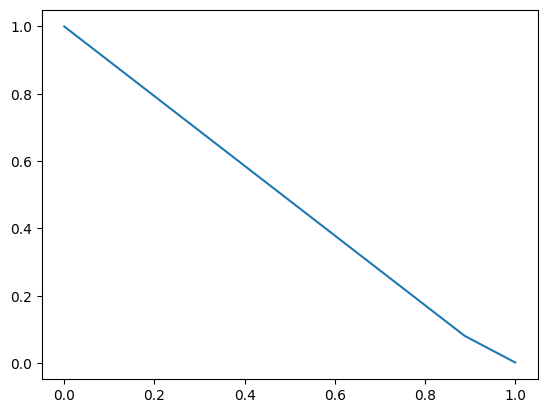

In [29]:
y_predict=logreg.predict(x_test)#aa function tho predict chestam(trained model ippudu adi(logreg))
precision,recall,threshold=precision_recall_curve(y_test,y_predict)
print('accuracy(auc)={}'.format(auc(recall,precision)))
plt.plot(recall,precision)
print(classification_report(y_test,y_predict))
#last 4 lines just dani performance calculate chestunnam anthe 